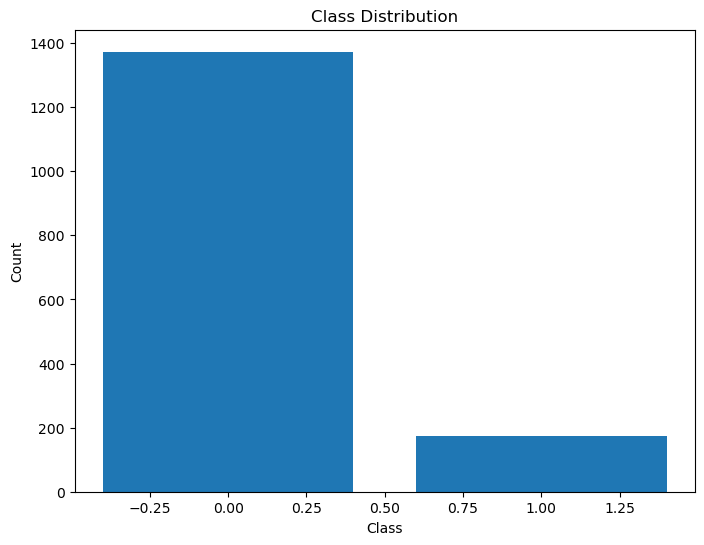

Imbalance Ratio: 0.13


In [1]:
#check imbalance data 

import pandas as pd
import matplotlib.pyplot as plt

# DATA
data = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card.csv')
labels = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card_label.csv')


class_counts = labels['label'].value_counts()
class_names = class_counts.index


plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# COMPUTUTE IMBALANCE RATIO
imbalance_ratio = class_counts[1] / class_counts[0]
print(f'Imbalance Ratio: {imbalance_ratio:.2f}')

In [2]:
#preprocess......with feature engineering 

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# DATA
data = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card.csv')
labels = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card_label.csv')


# SELECT COLUMNS
df_train = data[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members']]
df_label = labels[['Ind_ID', 'label']]


# IDENTIFY MISSING VALUES
print("Missing values in df_train:")
print(df_train.isnull().sum())
print("\nMissing values in df_label:")
print(df_label.isnull().sum())


# DROP ROWS WITH MISSING VALUES
df_train.dropna(inplace=True)
df_label.dropna(inplace=True)


# FILL MISSING VALUES WITH MEAN
mean_train = df_train.mean()
df_train.fillna(mean_train, inplace=True)
mean_label = df_label.mean()
df_label.fillna(mean_label, inplace=True)


# FILL MISSING VALUES WITH MODE
mode_train = df_train.mode().iloc[0]
df_train.fillna(mode_train, inplace=True)
mode_label = df_label.mode().iloc[0]
df_label.fillna(mode_label, inplace=True)


# NORMALIZE AND SCALING
scaler_train = MinMaxScaler()
num_cols_train = df_train.select_dtypes(include='number').columns
df_train[num_cols_train] = scaler_train.fit_transform(df_train[num_cols_train])

scaler_label = MinMaxScaler()
num_cols_label = df_label.select_dtypes(include='number').columns
df_label[num_cols_label] = scaler_label.fit_transform(df_label[num_cols_label])


print("Statistics for df_train:")
print(df_train.describe())

print("Statistics for df_label:")
print(df_label.describe())

Missing values in df_train:
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Missing values in df_label:
Ind_ID    0
label     0
dtype: int64
Statistics for df_train:
            Ind_ID     CHILDREN  Annual_income  Birthday_count  Employed_days  \
count  1025.000000  1025.000000    1025.000000     1025.000000    1025.000000   
mean      0.510438     0.035331       0.106634        0.556842       0.822904   
std       0.296656     0.060318       0.078954        0.215167       0.162008   
min       0.000000     0.000000       0.000000        0.000000       0.000000   
25%       0.258319     0.000000       0.064327   

C:\Users\nh013\AppData\Local\Temp\ipykernel_20812\1340121282.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_train = df_train.mean()


In [3]:
#perform onehotencoding for categorical col, and use isolationforest for handle outlier...

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest

# DATA
data = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card.csv')
labels = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card_label.csv')


# SELECT COLUMNS
df_train = data[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members']]
df_label = labels[['Ind_ID', 'label']]


# IDENTIFY MISSING VALUES
print("Missing values in df_train:")
print(df_train.isnull().sum())
print("\nMissing values in df_label:")
print(df_label.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df_train.dropna(inplace=True)
df_label.dropna(inplace=True)


# FILL MISSING VALUES WITH MEAN
mean_train = df_train.mean()
df_train.fillna(mean_train, inplace=True)
mean_label = df_label.mean()
df_label.fillna(mean_label, inplace=True)


# HANDLE OUTLIERS USING ISOLATION FOREST
numerical_columns = ['Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']

iso_forest = IsolationForest(contamination=0.05)  
outliers = iso_forest.fit_predict(df_train[numerical_columns])
df_train = df_train[outliers == 1]  # KEEP NON OUTLIERS


# FILTER DF_LABEL TO MATCH THE NUMBER OF ROWS IN DF_TRAIN
df_label = df_label[df_label['Ind_ID'].isin(df_train['Ind_ID'])]


# FILL MISSING VALUES WITH MODE
mode_train = df_train.mode().iloc[0]
df_train.fillna(mode_train, inplace=True)
mode_label = df_label.mode().iloc[0]
df_label.fillna(mode_label, inplace=True)



# ONE-HOT ENCODING FOR CATEGORICAL COLUMNS
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'Type_Occupation']

encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_features = encoder.fit_transform(df_train[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))  


# CONCATINATE THE ENCODED CATEGORICAL COL WITH THE NUMERICAL COL
num_cols_train = df_train.select_dtypes(include='number').columns
df_train_encoded = pd.concat([df_train[num_cols_train], encoded_df], axis=1)

#DROP MISSING VALUES
df_train_encoded.dropna(inplace=True)




# FILTER DF_LABEL TO MATCH THE NUMBER OF ROWS IN DF_TRAIN
df_train_encoded = df_train_encoded[df_train_encoded['Ind_ID'].isin(df_label['Ind_ID'])]

# RESET THE INDEX OF THE BOTH DATAFRAME 
df_train_encoded.reset_index(drop=True, inplace=True)
df_label.reset_index(drop=True, inplace=True)



# NORMALIZE AND SCALING
scaler_train = MinMaxScaler()
num_cols_train = df_train_encoded.select_dtypes(include='number').columns
df_train_encoded[num_cols_train] = scaler_train.fit_transform(df_train_encoded[num_cols_train])

scaler_label = MinMaxScaler()
num_cols_label = df_label.select_dtypes(include='number').columns
df_label[num_cols_label] = scaler_label.fit_transform(df_label[num_cols_label])


print("Final df_train_encoded after one-hot encoding and scaling:")
print(df_train_encoded.head())
print("Shape of df_train_encoded:", df_train_encoded.shape)

print("Shape of df_label:", df_label.shape)



print("Missing values in df_train_encoded:")
print(df_train_encoded.isnull().sum())

print("\nMissing values in df_label:")
print(df_label.isnull().sum())

Missing values in df_train:
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Missing values in df_label:
Ind_ID    0
label     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_20812\1256589467.py:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_train = df_train.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Final df_train_encoded after one-hot encoding and scaling:
     Ind_ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
0  0.014159  0.333333       0.754098        0.351385       0.947249   
1  0.014187  0.333333       0.754098        0.351385       0.947249   
2  0.068231  0.000000       0.098361        0.303241       0.918999   
3  0.068266  0.000000       0.098361        0.303241       0.918999   
4  0.088149  0.000000       0.426230        0.430510       0.984741   

   Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  ...  \
0           0.0         0.0    1.0       1.0            0.50  ...   
1           0.0         0.0    1.0       1.0            0.50  ...   
2           0.0         1.0    1.0       0.0            0.25  ...   
3           0.0         1.0    1.0       0.0            0.25  ...   
4           0.0         0.0    0.0       0.0            0.25  ...   

   Type_Occupation_Laborers  Type_Occupation_Low-skill Laborers  \
0                       1.0     

C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
# check x and y shape is samee?

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest


# DATA
data = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card.csv')
labels = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card_label.csv')

# SELECT COLUMNS
df_train = data[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members']]
df_label = labels[['Ind_ID', 'label']]

# IDENTIFY MISSING VALUES
print("Missing values in df_train:")
print(df_train.isnull().sum())
print("\nMissing values in df_label:")
print(df_label.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df_train.dropna(inplace=True)
df_label.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean_train = df_train.mean()
df_train.fillna(mean_train, inplace=True)
mean_label = df_label.mean()
df_label.fillna(mean_label, inplace=True)


# HANDLE OUTLIERS USING ISOLATION FOREST
numerical_columns = ['Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']
iso_forest = IsolationForest(contamination=0.05)  
outliers = iso_forest.fit_predict(df_train[numerical_columns])
df_train = df_train[outliers == 1]  # KEEP NON OUTLIERS


# FILTER DF_LABEL TO MATCH THE NUMBER OF ROWS IN DF_TRAIN
df_train_encoded = df_train_encoded[df_train_encoded['Ind_ID'].isin(df_label['Ind_ID'])]


# FILL MISSING VALUES WITH MODE
mode_train = df_train.mode().iloc[0]
df_train.fillna(mode_train, inplace=True)
mode_label = df_label.mode().iloc[0]
df_label.fillna(mode_label, inplace=True)



# ONE-HOT ENCODING FOR CATEGORICAL COLUMNS
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'Type_Occupation']

encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_features = encoder.fit_transform(df_train[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))  

# CONCATINATE THE ENCODED CATEGORICAL COL WITH THE NUMERICAL COL
num_cols_train = df_train.select_dtypes(include='number').columns
df_train_encoded = pd.concat([df_train[num_cols_train], encoded_df], axis=1)

# DROP MISSING VALUES
df_train_encoded.dropna(inplace=True)

# FILTER DF_LABEL TO MATCH THE NUMBER OF ROWS IN DF_TRAIN
df_train_encoded = df_train_encoded[df_train_encoded['Ind_ID'].isin(df_label['Ind_ID'])]

# RESET THE INDEX OF BOTH DATAFRAME 
df_train_encoded.reset_index(drop=True, inplace=True)
df_label.reset_index(drop=True, inplace=True)

# NORMALIZE AND SCALING
scaler_train = MinMaxScaler()
num_cols_train = df_train_encoded.select_dtypes(include='number').columns
df_train_encoded[num_cols_train] = scaler_train.fit_transform(df_train_encoded[num_cols_train])

scaler_label = MinMaxScaler()
num_cols_label = df_label.select_dtypes(include='number').columns
df_label[num_cols_label] = scaler_label.fit_transform(df_label[num_cols_label])

# SPLITTING DATA INTO TRAIN AND TEST SETS
X = df_train_encoded.drop(columns=['Ind_ID'])
y = df_label['label']

# CHECKING THE SHAPE OF INPUT VARIABLES
print("Shape of X (input features):", X.shape)
print("Shape of y (labels):", y.shape)

Missing values in df_train:
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Missing values in df_label:
Ind_ID    0
label     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_20812\889143538.py:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_train = df_train.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Shape of X (input features): (601, 46)
Shape of y (labels): (1548,)


C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# set both are same x and y.....

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest

# DATA
data = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card.csv')
labels = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card_label.csv')

# SELECT COLUMNS
df_train = data[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members']]
df_label = labels[['Ind_ID', 'label']]

# IDENTIFY MISSING VALUES
print("Missing values in df_train:")
print(df_train.isnull().sum())
print("\nMissing values in df_label:")
print(df_label.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df_train.dropna(inplace=True)
df_label.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean_train = df_train.mean()
df_train.fillna(mean_train, inplace=True)
mean_label = df_label.mean()
df_label.fillna(mean_label, inplace=True)

# HANDLE OUTLIERS USING ISOLATION FOREST
numerical_columns = ['Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']

iso_forest = IsolationForest(contamination=0.05)  
outliers = iso_forest.fit_predict(df_train[numerical_columns])
df_train = df_train[outliers == 1] 

# DF_LABEL TO MATCH THE NUMBER OF ROWS IN DF_TRAIN
df_label = df_label[df_label['Ind_ID'].isin(df_train['Ind_ID'])]

#RESET THE INDEX FOR BOTH DATAFRAME 
df_train.reset_index(drop=True, inplace=True)
df_label.reset_index(drop=True, inplace=True)

# FILL MISSING VALUES WITH MODE
mode_train = df_train.mode().iloc[0]
df_train.fillna(mode_train, inplace=True)
mode_label = df_label.mode().iloc[0]
df_label.fillna(mode_label, inplace=True)

# ONE-HOT ENCODING FOR CATEGORICAL COLUMNS
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'Type_Occupation']

encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_features = encoder.fit_transform(df_train[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))  

# CONCATINATE THE ENCODED CATEGORICAL COL WITH THE NUMERICAL COL
num_cols_train = df_train.select_dtypes(include='number').columns
df_train_encoded = pd.concat([df_train[num_cols_train], encoded_df], axis=1)

# DROP MISSING VALUES
df_train_encoded.dropna(inplace=True)


# NORMALIZE AND SCALING
scaler_train = MinMaxScaler()
num_cols_train = df_train_encoded.select_dtypes(include='number').columns
df_train_encoded[num_cols_train] = scaler_train.fit_transform(df_train_encoded[num_cols_train])

scaler_label = MinMaxScaler()
num_cols_label = df_label.select_dtypes(include='number').columns
df_label[num_cols_label] = scaler_label.fit_transform(df_label[num_cols_label])

# SPLITTING DATA INTO TRAIN AND TEST SETS
X = df_train_encoded.drop(columns=['Ind_ID'])
y = df_label['label']

# CHECKING THE SHAPE OF INPUT VARIABLES
print("Shape of X (input features):", X.shape)
print("Shape of y (labels):", y.shape)

Missing values in df_train:
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Missing values in df_label:
Ind_ID    0
label     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_20812\436387705.py:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_train = df_train.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Shape of X (input features): (974, 46)
Shape of y (labels): (974,)


C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
#perform logistic regression........

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# DATA
data = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card.csv')
labels = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card_label.csv')

# SELECT COLUMNS
df_train = data[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members']]
df_label = labels[['Ind_ID', 'label']]

# IDENTIFY MISSING VALUES
print("Missing values in df_train:")
print(df_train.isnull().sum())
print("\nMissing values in df_label:")
print(df_label.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df_train.dropna(inplace=True)
df_label.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean_train = df_train.mean()
df_train.fillna(mean_train, inplace=True)
mean_label = df_label.mean()
df_label.fillna(mean_label, inplace=True)

# HANDLE OUTLIERS USING ISOLATION FOREST
numerical_columns = ['Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']

iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
outliers = iso_forest.fit_predict(df_train[numerical_columns])
df_train = df_train[outliers == 1]  # Keep non-outliers

# DF_LABEL TO MATCH THE NUMBER OF ROWS IN DF_TRAIN
df_label = df_label[df_label['Ind_ID'].isin(df_train['Ind_ID'])]

#RESET THE INDEX FOR BOTH DATAFRAME 
df_train.reset_index(drop=True, inplace=True)
df_label.reset_index(drop=True, inplace=True)

# FILL MISSING VALUES WITH MODE
mode_train = df_train.mode().iloc[0]
df_train.fillna(mode_train, inplace=True)
mode_label = df_label.mode().iloc[0]
df_label.fillna(mode_label, inplace=True)

# ONE-HOT ENCODING FOR CATEGORICAL COLUMNS
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'Type_Occupation']

encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_features = encoder.fit_transform(df_train[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns)) 

# CONCATINATE THE ENCODED CATEGORICAL COL WITH THE NUMERICAL COL
num_cols_train = df_train.select_dtypes(include='number').columns
df_train_encoded = pd.concat([df_train[num_cols_train], encoded_df], axis=1)

# DROP MISSING VALUES
df_train_encoded.dropna(inplace=True)


# NORMALIZE AND SCALING
scaler_train = MinMaxScaler()
num_cols_train = df_train_encoded.select_dtypes(include='number').columns
df_train_encoded[num_cols_train] = scaler_train.fit_transform(df_train_encoded[num_cols_train])

scaler_label = MinMaxScaler()
num_cols_label = df_label.select_dtypes(include='number').columns
df_label[num_cols_label] = scaler_label.fit_transform(df_label[num_cols_label])

# SPLITTING DATA INTO TRAIN AND TEST SETS
X = df_train_encoded.drop(columns=['Ind_ID'])
y = df_label['label']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAINING A LOGISTIC REGRESSION MODEL
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# PREDICTIONS
y_pred = logistic_model.predict(X_test)

# EVALUATION
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Missing values in df_train:
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Missing values in df_label:
Ind_ID    0
label     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_20812\2681786456.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_train = df_train.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.8974358974358975
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       175
         1.0       0.50      0.05      0.09        20

    accuracy                           0.90       195
   macro avg       0.70      0.52      0.52       195
weighted avg       0.86      0.90      0.86       195



C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# perform random forest model ....

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# DATA
data = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card.csv')
labels = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card_label.csv')

# SELECT COLUMNS
df_train = data[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members']]
df_label = labels[['Ind_ID', 'label']]

# IDENTIFY MISSING VALUES
print("Missing values in df_train:")
print(df_train.isnull().sum())
print("\nMissing values in df_label:")
print(df_label.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df_train.dropna(inplace=True)
df_label.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean_train = df_train.mean()
df_train.fillna(mean_train, inplace=True)
mean_label = df_label.mean()
df_label.fillna(mean_label, inplace=True)

# HANDLE OUTLIERS USING ISOLATION FOREST
numerical_columns = ['Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']

iso_forest = IsolationForest(contamination=0.05)  
outliers = iso_forest.fit_predict(df_train[numerical_columns])
df_train = df_train[outliers == 1] 

# DF_LABEL TO MATCH THE NUMBER OF ROWS IN DF_TRAIN
df_label = df_label[df_label['Ind_ID'].isin(df_train['Ind_ID'])]

#RESET THE INDEX FOR BOTH DATAFRAME 
df_train.reset_index(drop=True, inplace=True)
df_label.reset_index(drop=True, inplace=True)

# FILL MISSING VALUES WITH MODE
mode_train = df_train.mode().iloc[0]
df_train.fillna(mode_train, inplace=True)
mode_label = df_label.mode().iloc[0]
df_label.fillna(mode_label, inplace=True)

# ONE-HOT ENCODING FOR CATEGORICAL COLUMNS
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'Type_Occupation']

encoder = OneHotEncoder(sparse=False, drop='first') 
encoded_features = encoder.fit_transform(df_train[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))  

# CONCATINATE THE ENCODED CATEGORICAL COL WITH THE NUMERICAL COL
num_cols_train = df_train.select_dtypes(include='number').columns
df_train_encoded = pd.concat([df_train[num_cols_train], encoded_df], axis=1)

# DROP MISSING VALUES
df_train_encoded.dropna(inplace=True)


# NORMALIZE AND SCALING
scaler_train = MinMaxScaler()
num_cols_train = df_train_encoded.select_dtypes(include='number').columns
df_train_encoded[num_cols_train] = scaler_train.fit_transform(df_train_encoded[num_cols_train])

scaler_label = MinMaxScaler()
num_cols_label = df_label.select_dtypes(include='number').columns
df_label[num_cols_label] = scaler_label.fit_transform(df_label[num_cols_label])

# SPLITTING DATA INTO TRAIN AND TEST SETS
X = df_train_encoded.drop(columns=['Ind_ID'])
y = df_label['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAINING A RANDOM FOREST CLASSIFIER
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# PREDICTIONS
y_pred = rf_classifier.predict(X_test)

# EVALUATION
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Missing values in df_train:
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Missing values in df_label:
Ind_ID    0
label     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_20812\3398551143.py:28: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_train = df_train.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       175
         1.0       0.82      0.45      0.58        20

    accuracy                           0.93       195
   macro avg       0.88      0.72      0.77       195
weighted avg       0.93      0.93      0.92       195



In [8]:
#perform xgboost model .......

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# DATA
data = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card.csv')
labels = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card_label.csv')

# SELECT COLUMNS
df_train = data[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members']]
df_label = labels[['Ind_ID', 'label']]

# IDENTIFY MISSING VALUES
print("Missing values in df_train:")
print(df_train.isnull().sum())
print("\nMissing values in df_label:")
print(df_label.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df_train.dropna(inplace=True)
df_label.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean_train = df_train.mean()
df_train.fillna(mean_train, inplace=True)
mean_label = df_label.mean()
df_label.fillna(mean_label, inplace=True)

# HANDLE OUTLIERS USING ISOLATION FOREST
numerical_columns = ['Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']

iso_forest = IsolationForest(contamination=0.05)  
outliers = iso_forest.fit_predict(df_train[numerical_columns])
df_train = df_train[outliers == 1] 

# DF_LABEL TO MATCH THE NUMBER OF ROWS IN DF_TRAIN
df_label = df_label[df_label['Ind_ID'].isin(df_train['Ind_ID'])]

#RESET THE INDEX FOR BOTH DATAFRAME 
df_train.reset_index(drop=True, inplace=True)
df_label.reset_index(drop=True, inplace=True)

# FILL MISSING VALUES WITH MODE
mode_train = df_train.mode().iloc[0]
df_train.fillna(mode_train, inplace=True)
mode_label = df_label.mode().iloc[0]
df_label.fillna(mode_label, inplace=True)

# ONE-HOT ENCODING FOR CATEGORICAL COLUMNS
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'Type_Occupation']

encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_features = encoder.fit_transform(df_train[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))  

# CONCATINATE THE ENCODED CATEGORICAL COL WITH THE NUMERICAL COL
num_cols_train = df_train.select_dtypes(include='number').columns
df_train_encoded = pd.concat([df_train[num_cols_train], encoded_df], axis=1)

# DROP MISSING VALUES
df_train_encoded.dropna(inplace=True)


# NORMALIZE AND SCALING
scaler_train = MinMaxScaler()
num_cols_train = df_train_encoded.select_dtypes(include='number').columns
df_train_encoded[num_cols_train] = scaler_train.fit_transform(df_train_encoded[num_cols_train])

scaler_label = MinMaxScaler()
num_cols_label = df_label.select_dtypes(include='number').columns
df_label[num_cols_label] = scaler_label.fit_transform(df_label[num_cols_label])

# SPLITTING DATA INTO TRAIN AND TEST SETS
X = df_train_encoded.drop(columns=['Ind_ID'])
y = df_label['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAINING AN XGBOOST CLASSIFIER
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# PREDICTIONS
y_pred = xgb_classifier.predict(X_test)

# EVALUATION
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Missing values in df_train:
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Missing values in df_label:
Ind_ID    0
label     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_20812\861572752.py:30: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_train = df_train.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.9230769230769231
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       175
         1.0       0.63      0.60      0.62        20

    accuracy                           0.92       195
   macro avg       0.79      0.78      0.79       195
weighted avg       0.92      0.92      0.92       195



In [9]:
#perform ANNs model .......


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report

# DATA
data = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card.csv')
labels = pd.read_csv('C:/Users/nh013/Desktop/Credit card Details Binary Classification Problem/Credit_card_label.csv')

# SELECT COLUMNS
df_train = data[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members']]
df_label = labels[['Ind_ID', 'label']]

# IDENTIFY MISSING VALUES
print("Missing values in df_train:")
print(df_train.isnull().sum())
print("\nMissing values in df_label:")
print(df_label.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df_train.dropna(inplace=True)
df_label.dropna(inplace=True)

# FILL MISSING VALUES WITH MEAN
mean_train = df_train.mean()
df_train.fillna(mean_train, inplace=True)
mean_label = df_label.mean()
df_label.fillna(mean_label, inplace=True)

# HANDLE OUTLIERS USING ISOLATION FOREST
numerical_columns = ['Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']

iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
outliers = iso_forest.fit_predict(df_train[numerical_columns])
df_train = df_train[outliers == 1]  # Keep non-outliers

# DF_LABEL TO MATCH THE NUMBER OF ROWS IN DF_TRAIN
df_label = df_label[df_label['Ind_ID'].isin(df_train['Ind_ID'])]

#RESET THE INDEX FOR BOTH DATAFRAME 
df_train.reset_index(drop=True, inplace=True)
df_label.reset_index(drop=True, inplace=True)


# FILL MISSING VALUES WITH MODE
mode_train = df_train.mode().iloc[0]
df_train.fillna(mode_train, inplace=True)
mode_label = df_label.mode().iloc[0]
df_label.fillna(mode_label, inplace=True)

# ONE-HOT ENCODING FOR CATEGORICAL COLUMNS
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone', 'Type_Occupation']

encoder = OneHotEncoder(sparse=False, drop='first')  
encoded_features = encoder.fit_transform(df_train[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))


# CONCATINATE THE ENCODED CATEGORICAL COL WITH THE NUMERICAL COL
num_cols_train = df_train.select_dtypes(include='number').columns
df_train_encoded = pd.concat([df_train[num_cols_train], encoded_df], axis=1)

# DROP MISSING VALUES
df_train_encoded.dropna(inplace=True)

# NORMALIZE AND SCALING
scaler_train = MinMaxScaler()
num_cols_train = df_train_encoded.select_dtypes(include='number').columns
df_train_encoded[num_cols_train] = scaler_train.fit_transform(df_train_encoded[num_cols_train])

scaler_label = MinMaxScaler()
num_cols_label = df_label.select_dtypes(include='number').columns
df_label[num_cols_label] = scaler_label.fit_transform(df_label[num_cols_label])

# SPLITTING DATA INTO TRAIN AND TEST SETS
X = df_train_encoded.drop(columns=['Ind_ID'])
y = df_label['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NORMALIZE NUMERICAL FEATURES EXCLUDING 'Ind_ID'
num_cols_train = [col for col in num_cols_train if col != 'Ind_ID']

scaler = MinMaxScaler()
X_train[num_cols_train] = scaler.fit_transform(X_train[num_cols_train])
X_test[num_cols_train] = scaler.transform(X_test[num_cols_train])


# BUILDING THE ANN MODEL
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(64, activation='relu'),   
    layers.Dense(1, activation='sigmoid')  
])

# COMPILING THE MODEL
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# TRAINING THE MODEL
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# PREDICTIONS
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# EVALUATION
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Missing values in df_train:
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Missing values in df_label:
Ind_ID    0
label     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_20812\3779863566.py:33: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_train = df_train.mean()
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\nh013\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
25/25 [==============================] - 2s 15ms/step - loss: 0.4323 - accuracy: 0.8882 - val_loss: 0.3478 - val_accuracy: 0.8974
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.8882 - val_loss: 0.3384 - val_accuracy: 0.8974
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3357 - accuracy: 0.8882 - val_loss: 0.3320 - val_accuracy: 0.8974
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3296 - accuracy: 0.8882 - val_loss: 0.3272 - val_accuracy: 0.8974
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.8882 - val_loss: 0.3256 - val_accuracy: 0.8974
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.8882 - val_loss: 0.3190 - val_accuracy: 0.8974
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3027 - accuracy: 0.8882 - val_loss: 0.3153 - val_accuracy: 0.8974
Epoch 8/10
25/25 [=